# Notes to discuss with prof

1. since the data is very skewed it won't make sense for us to do cross validation where we randomly choose which data to use for training and which data to use for testing, because if do that after duplicating the low count data then most of the data in testing set will be in training set
2. what is the difference between training the network after performing oversampling and just training the network on the same data but more epochs
3. can we train the model with just 64 examples but keep the positive class data same and randomly choose rest of 32 negative class data?

In [30]:
from mygrad import Layer
from mygrad import Value

In [31]:
import pickle
with open('data.pckl', 'rb') as file:
    data = pickle.load(file)

In [32]:
from sklearn.utils import shuffle
data = shuffle(data)


In [33]:
X = [list(number) for number in data['number']]
Y = [label for label in data['label']]

len(X)

1024

In [34]:
for ix, row in enumerate(X):
    X[ix] = [Value(float(item)) for item in row]


In [35]:
Xtrain, Xtest, Ytrain, Ytest = X[:int(len(X)*0.8)], X[int(len(X)*0.8):], Y[:int(len(X)*0.8)], Y[int(len(X)*0.8):]

In [42]:
hiddenLayer1 = Layer(10, 1, activation='sigmoid')
outputLayer = Layer(11, 1, activation='sigmoid')
parameters =  outputLayer.parameters() + hiddenLayer1.parameters()
print(parameters)

[Value(data=-0.034684765382946514), Value(data=-0.23918944181825363), Value(data=0.0732111730460534), Value(data=-0.5215408661478229), Value(data=-0.4728830368289427), Value(data=0.8310076261353894), Value(data=-0.7894168749182979), Value(data=-0.33703416910454287), Value(data=0.5196376896818546), Value(data=0.8592495689641242), Value(data=0.597673755202166), Value(data=0.805042829704053), Value(data=-0.8862756671417198), Value(data=0.3801409711292516), Value(data=-0.8038465497065537), Value(data=0.9417254508008597), Value(data=-0.5668438214924085), Value(data=-0.26903842925261223), Value(data=-0.07920906030582797), Value(data=-0.41301154717565325), Value(data=-0.8570294048519271), Value(data=-0.027645631969972717), Value(data=0.4536663893103827)]


In [43]:
def predict(x):
    x1 = hiddenLayer1(x)    
    final = outputLayer([x1] + x)
    return final

In [44]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
def getAccuracy(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    return accuracy_score(Y, predicted)
def getPrecision(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    return precision_score(Y, predicted)
def getf1(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    return f1_score(Y, predicted)
def getRecall(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    return recall_score(Y, predicted)


In [45]:
getAccuracy(Xtest, Ytest)

0.4926829268292683

# Without momentum term

In [46]:
losss = []
prevchange = [0]*len(parameters)
beta = 0 # parameter for momentum update set to 0 so no momentum term present

In [47]:
lr = 1
epochs = 1000

for _ in range(epochs):
    Y_pred = [predict(x) for x in Xtrain]
    loss = Value(0)
    for i in range(len(Ytrain)):
        if Ytrain[i] == 1:
            loss -= Y_pred[i].log()
        else:
            loss -= (Value(1) - Y_pred[i]).log()
    loss = loss/len(X)
    loss.backward()

    for ix, p in enumerate(parameters):
        change = lr*p.grad
        p.data = p.data -change
        prevchange[ix] = change

    for p in parameters:
        p.grad = 0
    losss.append(loss.data)
    print('loss:', loss.data,'epoch:', _)
print( 'test accuracy:', getAccuracy(Xtest, Ytest),'train accuracy:', getAccuracy(Xtrain, Ytrain))
print( 'test f1score:', getf1(Xtest, Ytest),'train f1score:', getf1(Xtrain, Ytrain))
print( 'test recallscore:', getRecall(Xtest, Ytest),'train recallscore:', getRecall(Xtrain, Ytrain))
print( 'test precisionscore', getPrecision(Xtest, Ytest),'train precisionscore', getPrecision(Xtrain, Ytrain))


loss: 0.739235736952122 epoch: 0
loss: 0.6494775665783156 epoch: 1
loss: 0.623464786531649 epoch: 2
loss: 0.6096740320139341 epoch: 3
loss: 0.598120344690557 epoch: 4
loss: 0.5874393921266412 epoch: 5
loss: 0.5774207540639034 epoch: 6
loss: 0.5679964635504203 epoch: 7
loss: 0.5591183633335417 epoch: 8
loss: 0.5507437758496049 epoch: 9
loss: 0.5428337711011796 epoch: 10
loss: 0.5353528183667327 epoch: 11
loss: 0.5282685599703595 epoch: 12
loss: 0.5215515799993778 epoch: 13
loss: 0.5151751650918802 epoch: 14
loss: 0.5091150655274728 epoch: 15
loss: 0.5033492636616617 epoch: 16
loss: 0.4978577545551482 epoch: 17
loss: 0.49262234176719 epoch: 18
loss: 0.4876264498319283 epoch: 19
loss: 0.482854953876357 epoch: 20
loss: 0.4782940260989493 epoch: 21
loss: 0.4739309983395042 epoch: 22
loss: 0.46975423967226226 epoch: 23
loss: 0.46575304779528365 epoch: 24
loss: 0.46191755292901365 epoch: 25
loss: 0.4582386329447815 epoch: 26
loss: 0.4547078384960658 epoch: 27
loss: 0.45131732700457733 epoch: 

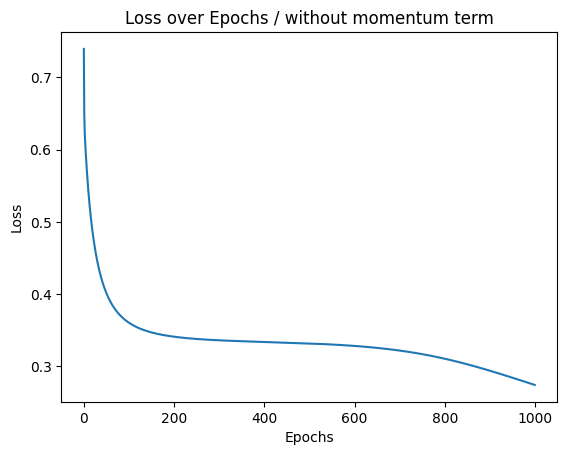

In [48]:
import matplotlib.pyplot as plt

plt.plot(losss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs / without momentum term')
plt.show()


# with momentum term

In [49]:
hiddenLayer1 = Layer(10, 1, activation='sigmoid')
outputLayer = Layer(11, 1, activation='sigmoid')
parameters =  outputLayer.parameters() + hiddenLayer1.parameters()
print(parameters)

[Value(data=-0.9156020006719816), Value(data=0.20152938529131248), Value(data=0.7251703250064885), Value(data=-0.6417525276973999), Value(data=0.3649068560315416), Value(data=-0.06716789535309609), Value(data=-0.9080786099151199), Value(data=0.5104923740468335), Value(data=-0.2450018613778593), Value(data=0.007049342562012395), Value(data=-0.014258709907970957), Value(data=-0.27015069349396303), Value(data=0.9731628209624521), Value(data=-0.3120538695328665), Value(data=-0.7316455578209196), Value(data=-0.7376009356387492), Value(data=0.8433380018618686), Value(data=-0.9872198278645914), Value(data=0.9625113415021311), Value(data=-0.604079207864936), Value(data=-0.7012611340594368), Value(data=-0.019487036539725056), Value(data=0.7756429909853104)]


In [50]:
losss = []
prevchange = [0]*len(parameters)
beta = 0.7 # parameter for momentum update set to 0 so no momentum term present

In [51]:
lr = 1
epochs = 1000

for _ in range(epochs):
    Y_pred = [predict(x) for x in Xtrain]
    loss = Value(0)
    for i in range(len(Ytrain)):
        if Ytrain[i] == 1:
            loss -= Y_pred[i].log()
        else:
            loss -= (Value(1) - Y_pred[i]).log()
    loss = loss/len(X)
    loss.backward()

    for ix, p in enumerate(parameters):
        change = lr*p.grad
        p.data = p.data -change
        prevchange[ix] = change

    for p in parameters:
        p.grad = 0
    losss.append(loss.data)
    print('loss:', loss.data,'epoch:', _)
print( 'test accuracy:', getAccuracy(Xtest, Ytest),'train accuracy:', getAccuracy(Xtrain, Ytrain))
print( 'test f1score:', getf1(Xtest, Ytest),'train f1score:', getf1(Xtrain, Ytrain))
print( 'test recallscore:', getRecall(Xtest, Ytest),'train recallscore:', getRecall(Xtrain, Ytrain))
print( 'test precisionscore', getPrecision(Xtest, Ytest),'train precisionscore', getPrecision(Xtrain, Ytrain))


loss: 0.6823430414559831 epoch: 0
loss: 0.6104270077365772 epoch: 1
loss: 0.5875854689910048 epoch: 2
loss: 0.5720026364502292 epoch: 3
loss: 0.5584177171257187 epoch: 4
loss: 0.5461639706834974 epoch: 5
loss: 0.5350610003194399 epoch: 6
loss: 0.5249839956050358 epoch: 7
loss: 0.5158211730886274 epoch: 8
loss: 0.5074704716424473 epoch: 9
loss: 0.49983959462925837 epoch: 10
loss: 0.4928459397424377 epoch: 11
loss: 0.4864162103656349 epoch: 12
loss: 0.4804857999606637 epoch: 13
loss: 0.47499804697655673 epoch: 14
loss: 0.469903436013268 epoch: 15
loss: 0.4651587989516536 epoch: 16
loss: 0.46072655127937034 epoch: 17
loss: 0.4565739845196351 epoch: 18
loss: 0.45267262523197677 epoch: 19
loss: 0.44899766387100776 epoch: 20
loss: 0.44552745214117634 epoch: 21
loss: 0.4422430647043074 epoch: 22
loss: 0.4391279196254392 epoch: 23
loss: 0.43616745134927837 epoch: 24
loss: 0.4333488299655275 epoch: 25
loss: 0.4306607208213012 epoch: 26
loss: 0.42809307901914195 epoch: 27
loss: 0.425636973899310

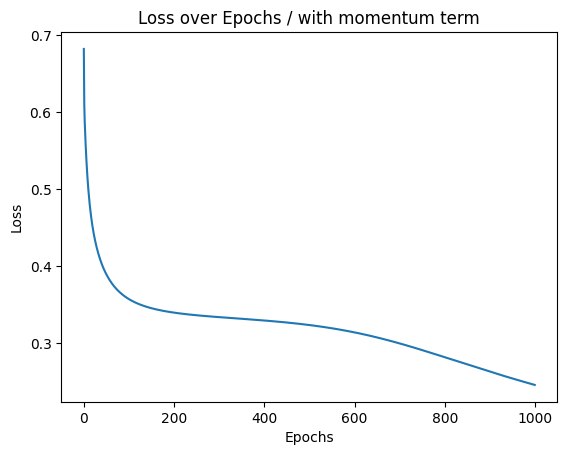

In [52]:
import matplotlib.pyplot as plt

plt.plot(losss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs / with momentum term')
plt.show()


# 4 fold cross validation


In [55]:
accuracies = []
f1scores = []
precisionscores = []
recallscores = []

for i in range(4):
    print('cross no.', i+1)
    Xtrain, Xtest = X[:len(X)*i//4] + X[len(X)*(i+1)//4:], X[len(X)*i//4:len(X)*(i+1)//4] 
    Ytrain, Ytest = Y[:len(X)*i//4] + Y[len(X)*(i+1)//4:], Y[len(X)*i//4:len(X)*(i+1)//4] 

    hiddenLayer1 = Layer(10, 1, activation='sigmoid')
    outputLayer = Layer(11, 1, activation='sigmoid')
    parameters =  outputLayer.parameters() + hiddenLayer1.parameters()

    losss = []
    prevchange = [0]*len(parameters)
    beta = 0.7 # parameter for momentum update
    lr = 1
    epochs = 2000

    for _ in range(epochs):
        Y_pred = [predict(x) for x in Xtrain]
        loss = Value(0)
        for i in range(len(Ytrain)):
            if Ytrain[i] == 1:
                loss -= Y_pred[i].log()
            else:
                loss -= (Value(1) - Y_pred[i]).log()
        loss = loss/len(X)
        loss.backward()

        for ix, p in enumerate(parameters):
            change = lr*p.grad
            p.data = p.data -change
            prevchange[ix] = change

        for p in parameters:
            p.grad = 0
        losss.append(loss.data)
        print('loss:', loss.data,'epoch:', _)
    print( 'accuracy','test', getAccuracy(Xtest, Ytest),'train', getAccuracy(Xtrain, Ytrain))
    print( 'f1score','test', getf1(Xtest, Ytest),'train', getf1(Xtrain, Ytrain))
    print( 'precision','test', getPrecision(Xtest, Ytest),'train', getPrecision(Xtrain, Ytrain))
    print( 'recall','test',getRecall(Xtest, Ytest),'train',getRecall(Xtrain, Ytrain))
    print()
    accuracies.append(getAccuracy(Xtest, Ytest))
    f1scores.append(getf1(Xtest, Ytest))
    precisionscores.append(getPrecision(Xtest, Ytest))
    recallscores.append(getRecall(Xtest, Ytest))

cross no. 1
loss: 0.8208302662557622 epoch: 0
loss: 0.6523598281059079 epoch: 1
loss: 0.5968326548688919 epoch: 2
loss: 0.5774657036905125 epoch: 3
loss: 0.5648890683944229 epoch: 4
loss: 0.5538877943270104 epoch: 5
loss: 0.543731373852355 epoch: 6
loss: 0.5342781637264158 epoch: 7
loss: 0.5254596639023814 epoch: 8
loss: 0.517219775626239 epoch: 9
loss: 0.5095079007158981 epoch: 10
loss: 0.502278036431135 epoch: 11
loss: 0.4954884690171494 epoch: 12
loss: 0.4891014919251181 epoch: 13
loss: 0.48308310409923855 epoch: 14
loss: 0.4774026977314257 epoch: 15
loss: 0.4720327472625553 epoch: 16
loss: 0.46694850858589404 epoch: 17
loss: 0.46212773453138234 epoch: 18
loss: 0.45755041035187666 epoch: 19
loss: 0.4531985111158839 epoch: 20
loss: 0.44905578157110704 epoch: 21
loss: 0.44510753809832443 epoch: 22
loss: 0.441340491744955 epoch: 23
loss: 0.43774259093928447 epoch: 24
loss: 0.4343028822776534 epoch: 25
loss: 0.43101138769720543 epoch: 26
loss: 0.42785899635614794 epoch: 27
loss: 0.42483

In [57]:
print('final accuracy:', sum(accuracies)/4)
print('final f1score', sum(f1scores)/4)
print('final precisionscore', sum(precisionscores)/4)
print('final recallscore', sum(recallscores)/4)

final accuracy: 0.8515625
final f1score 0.8607314988932636
final precisionscore 0.8138813778720649
final recallscore 0.9157252082620108


# Network Analysis

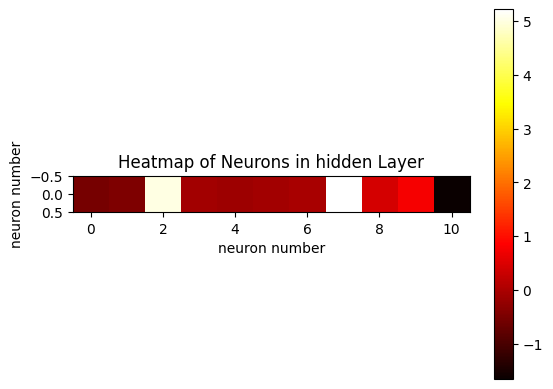

Text(0, 0.5, 'neuron number')

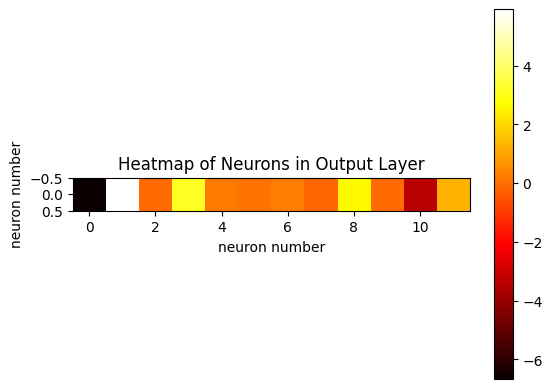

In [58]:
neuron1weightsbias = [v.data for v in hiddenLayer1.neurons[0].w] + [hiddenLayer1.neurons[0].b.data]
outputneuronweightsbias = [v.data for v in outputLayer.neurons[0].w] + [outputLayer.neurons[0].b.data]
import matplotlib.pyplot as plt

plt.imshow([neuron1weightsbias], cmap='hot')
plt.colorbar()
plt.title('Heatmap of Neurons in hidden Layer')
plt.xlabel('neuron number')
plt.ylabel('neuron number')
plt.show()

plt.imshow([outputneuronweightsbias], cmap='hot')
plt.colorbar()
plt.title('Heatmap of Neurons in Output Layer')
plt.xlabel('neuron number')
plt.ylabel('neuron number')


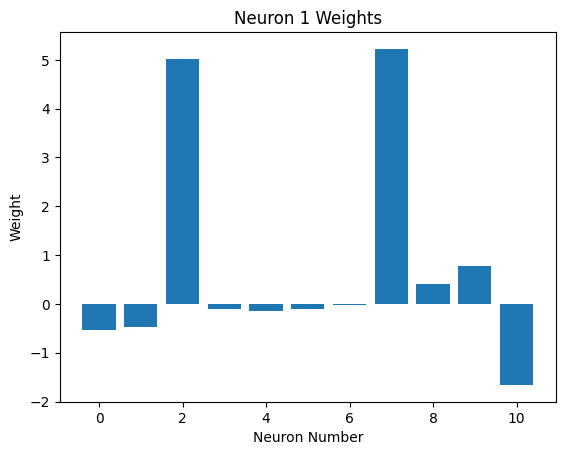

In [59]:
plt.bar(range(len(neuron1weightsbias)), neuron1weightsbias)
plt.xlabel('Neuron Number')
plt.ylabel('Weight')
plt.title('Neuron 1 Weights')
plt.show()


# Saving parameters

In [60]:
import pickle as pkl 

with open('parameters/neuron1weightsbias_fn.pckl', 'wb') as file:
    pkl.dump(neuron1weightsbias, file)
with open('parameters/outputneuronweightsbias_fn.pckl', 'wb') as file:
    pkl.dump(outputneuronweightsbias, file)

In [36]:
# Load model

def loadModel():
    neuron1weightsbias, outputneuronweightsbias = [], []
    with open(f'parameters/neuron1weightsbias2.pckl', 'rb') as file:
        neuron1weightsbias = pickle.load(file)
    with open('parameters/outputneuronweightsbias2.pckl', 'rb') as file:
        outputneuronweightsbias = pickle.load(file)
    hiddenLayer1_ = Layer(10, 1)
    outputLayer_ = Layer(11, 1)

    hiddenLayer1_.neurons[0].w = [Value(i) for i in neuron1weightsbias[:-1]]
    hiddenLayer1_.neurons[0].b = Value(neuron1weightsbias[-1])

    outputLayer_.neurons[0].w = [Value(i) for i in outputneuronweightsbias[:-1]]
    outputLayer_.neurons[0].b = Value(outputneuronweightsbias[-1])
    return hiddenLayer1_, outputLayer_, neuron1weightsbias, outputneuronweightsbias

In [37]:
import pickle as pkl 

hiddenLayer1, outputLayer, neuron1weightsbias, outputneuronweightsbias = loadModel()

In [38]:
getAccuracy(Xtest, Ytest)

0.9560975609756097

In [39]:
[round(i)for i in neuron1weightsbias]

[0, 2, 8, 6, -4, 4, -6, -8, -2, 0, -3]